## Hexagon Bin Plotter for Network Attacks

We call the libraries and the data from the experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import os

if not os.path.exists("Figures"):
    os.makedirs("Figures")

In [2]:
def load_data(filedir):
    
    mydata = np.genfromtxt(filedir,delimiter="\t")
    TotalDensity = [i[0] for i in mydata] #Total bacterial density
    Suc = [i[1] for i in mydata] #Susceptible strain total density
    Res = [i[2] for i in mydata] #Resistant strain total density
    Rel_Freq = [i[2]/(i[1]+i[2]) for i in mydata] #Resistant Relative Frequency
    Suc_win = [i[3] for i in mydata] #Number of wins of Susceptible strain
    Res_win = [i[4] for i in mydata] #Number of wins of Resistant strain
    Res_D_Score = [i[4]/50 for i in mydata] 
    Netdensity = [i[6] for i in mydata] #Network density
    clustc = [i[7] for i in mydata] #Network clustering coefficient
    clo_centr = [i[8] for i in mydata] #Closeness centrality
    ant_deg = [i[9] for i in mydata] #Antibiotic source connectivity
    bet_centr = [i[10] for i in mydata] #Betweeness centrality

    d = {'TotDen':TotalDensity,'SucDen':Suc,'ResDen':Res,'Rel_Freq':Rel_Freq,
           'Suc_win':Suc_win,'Res_D_Score':Res_D_Score, 'Res_win':Res_win, 
           'NetDen':Netdensity,'ClustC':clustc,'clo_centr':clo_centr,'ant_deg':ant_deg,
           'bet_centr':bet_centr}
    return pd.DataFrame(d)

We generate the function for plotting many comparisons

In [3]:
df = load_data("output/NetAttack_watts_out")

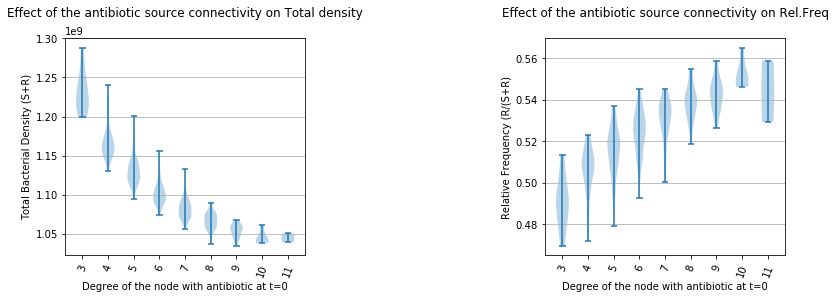

In [4]:
fig, axs = plt.subplots(ncols=2, sharey=False, figsize=(10, 4))
fig.subplots_adjust(wspace=1, left=0, right=1)

ax = axs[0]

ax.violinplot(dataset = [df[df.ant_deg == i]['TotDen'] for i in sorted(df.ant_deg.unique())])

ax.set_title('Effect of the antibiotic source connectivity on Total density', y = 1.07)
ax.set_xticks(range(1,len(df.ant_deg.unique())+1))
ax.set_xticklabels([int(i) for i in sorted(df.ant_deg.unique())],rotation=70)
ax.yaxis.grid(True)
ax.set_xlabel('Degree of the node with antibiotic at t=0')
ax.set_ylabel('Total Bacterial Density (S+R)')

ax = axs[1]

ax.violinplot(dataset = [df[df.ant_deg == i]['Rel_Freq'] for i in sorted(df.ant_deg.unique())])

ax.set_title('Effect of the antibiotic source connectivity on Rel.Freq', y = 1.07)
ax.set_xticks(range(1,len(df.ant_deg.unique())+1))
ax.set_xticklabels([int(i) for i in sorted(df.ant_deg.unique())],rotation=70)
ax.yaxis.grid(True)
ax.set_xlabel('Degree of the node with antibiotic at t=0')
ax.set_ylabel('Relative Frequency (R/(S+R)')

plt.savefig("Figures/violplot_SouCon_Effect_RelFreq", bbox_inches='tight')
plt.show()

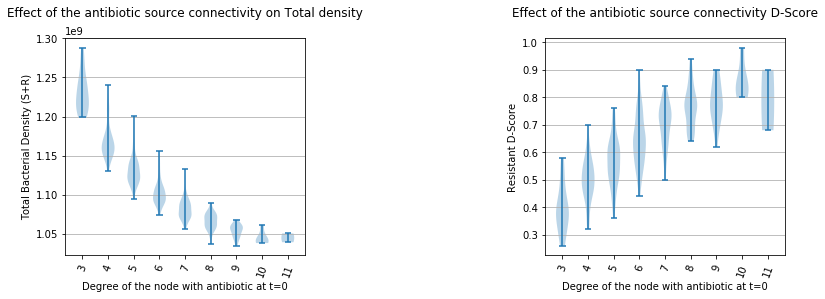

In [5]:
fig, axs = plt.subplots(ncols=2, sharey=False, figsize=(10, 4))
fig.subplots_adjust(wspace=1, left=0, right=1)

ax = axs[0]

ax.violinplot(dataset = [df[df.ant_deg == i]['TotDen'] for i in sorted(df.ant_deg.unique())])

ax.set_title('Effect of the antibiotic source connectivity on Total density', y = 1.07)
ax.set_xticks(range(1,len(df.ant_deg.unique())+1))
ax.set_xticklabels([int(i) for i in sorted(df.ant_deg.unique())],rotation=70)
ax.yaxis.grid(True)
ax.set_xlabel('Degree of the node with antibiotic at t=0')
ax.set_ylabel('Total Bacterial Density (S+R)')

ax = axs[1]

ax.violinplot(dataset = [df[df.ant_deg == i]['Res_D_Score'] for i in sorted(df.ant_deg.unique())])

ax.set_title('Effect of the antibiotic source connectivity D-Score', y = 1.07)
ax.set_xticks(range(1,len(df.ant_deg.unique())+1))
ax.set_xticklabels([int(i) for i in sorted(df.ant_deg.unique())],rotation=70)
ax.yaxis.grid(True)
ax.set_xlabel('Degree of the node with antibiotic at t=0')
ax.set_ylabel('Resistant D-Score')

plt.savefig("Figures/violplot_SouCon_Effect_DScore", bbox_inches='tight')
plt.show()